# Basic Analysis in SptialTis

SpatialTis provides some basic analysis

- Cell Components
- Cell Density
- Cell Morphology
- Cell Co-occurrence

To run the following analysis, you need to [Download](https://uofmacau-my.sharepoint.com/:u:/g/personal/yb97643_umac_mo/EXJFp1Nn_k5NphOp986lGvABmDNC_fNPGjrw5xN4NUPnRA?download=1) the data.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import anndata as ad

data = ad.read_h5ad("../data/imc_data.h5ad")
data

AnnData object with n_obs × n_vars = 1776974 × 38
    obs: 'area', 'eccentricity', 'islet_id', 'centroid', 'image', 'case', 'slide', 'part', 'group', 'stage', 'cell_cat', 'cell_type'
    var: 'markers'

In [3]:
import spatialtis as st
import spatialtis.plotting as sp
from spatialtis import CONFIG

CONFIG.EXP_OBS = ["stage", "case", "part", "image"] 
CONFIG.CELL_TYPE_KEY = "cell_type" 
CONFIG.MARKER_KEY = "markers"
CONFIG.CENTROID_KEY = "centroid"

## Cell Components

Used to calculate the fractions of cells.

In [4]:
st.cell_components(data)

We can visualize it, the default is static rendering.

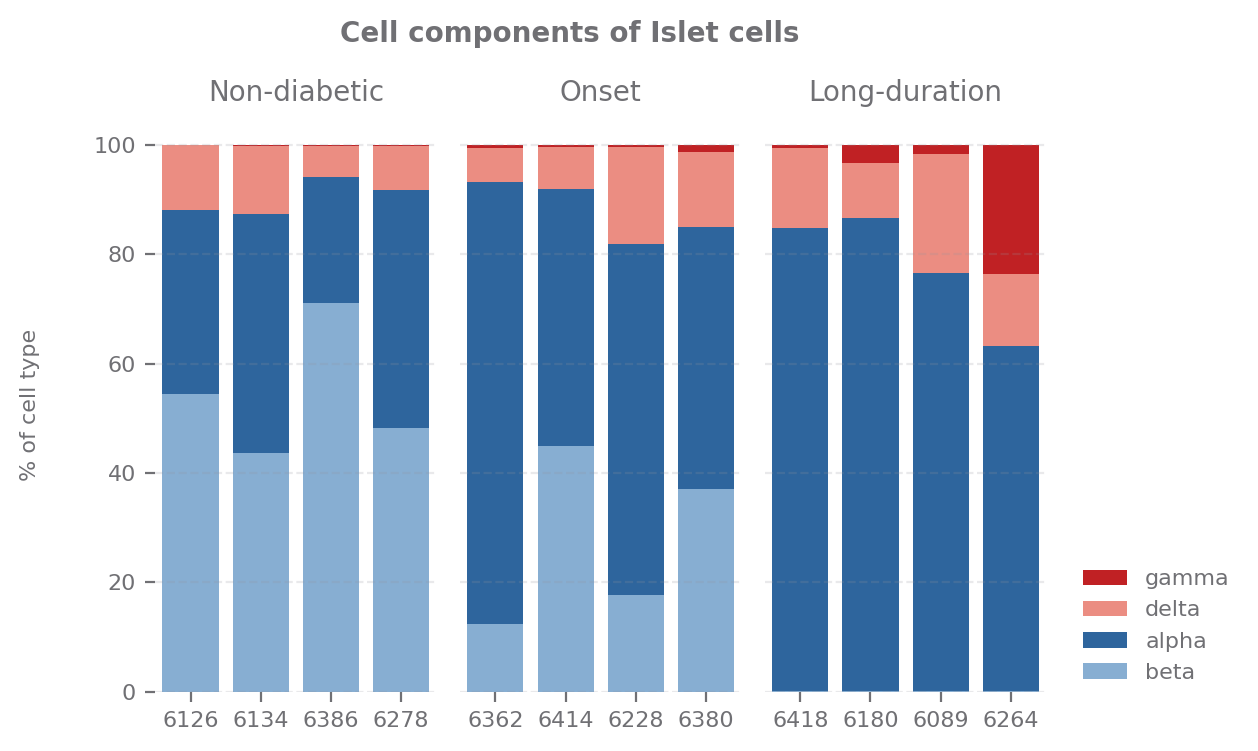

In [5]:
islets_cells = ['gamma', 'delta', 'alpha', 'beta',]
colors = ["#7aafde","#1b65b0","#fc7f71","#db060b"][::-1]
sp.cell_components(data, 
                   ["stage", "case"],
                   selected_types=islets_cells,
                   group_order={'stage':['Non-diabetic', 'Onset', 'Long-duration'],
                               'case':[6126,6134,6386,6278,6362,6414,6228,6380,6418,6180,6089,6264]},
                   palette=colors,
                   size=(5, 3.5),
                   title="Cell components of Islet cells",
                   yaxis_title="% of cell type")

Alternatively, you can pass `use="interactive"` to used bokeh, put your mouse on it to see extra information.

In [6]:
sp.cell_components(data, 
                   ["stage", "case"],
                   use="interactive",
                   selected_types=islets_cells[::-1],
                   group_order={'stage':['Non-diabetic', 'Onset', 'Long-duration'],
                               'case':[6126,6134,6386,6278,6362,6414,6228,6380,6418,6180,6089,6264]},
                   palette=colors, 
                   title="Cell components of Islet cells",
                   yaxis_title="% of cell type")

## Cell Density

Used to calculate the density of cells

In [7]:
st.cell_density(data, ratio=0.001)

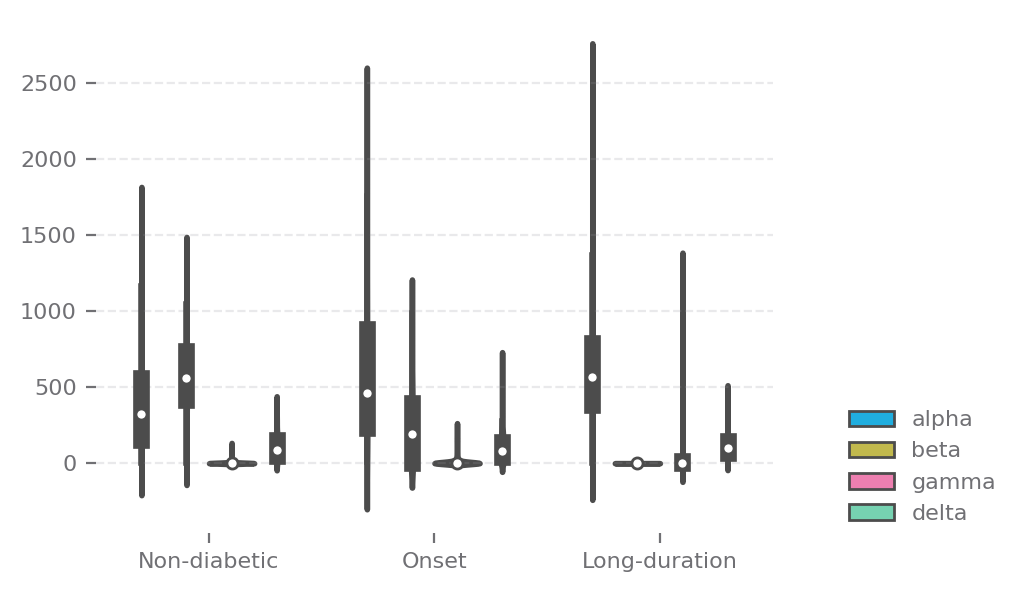

In [8]:
sp.cell_density(data, ['stage'], selected_types=['alpha', 'beta', 'gamma', 'delta'], 
                group_order={'stage':['Non-diabetic', 'Onset', 'Long-duration'],},
                             size=(4, 3))

## Cell Co-occurrence

To determine whether two cells will occur in the same ROI

In [9]:
st.cell_co_occurrence(data)

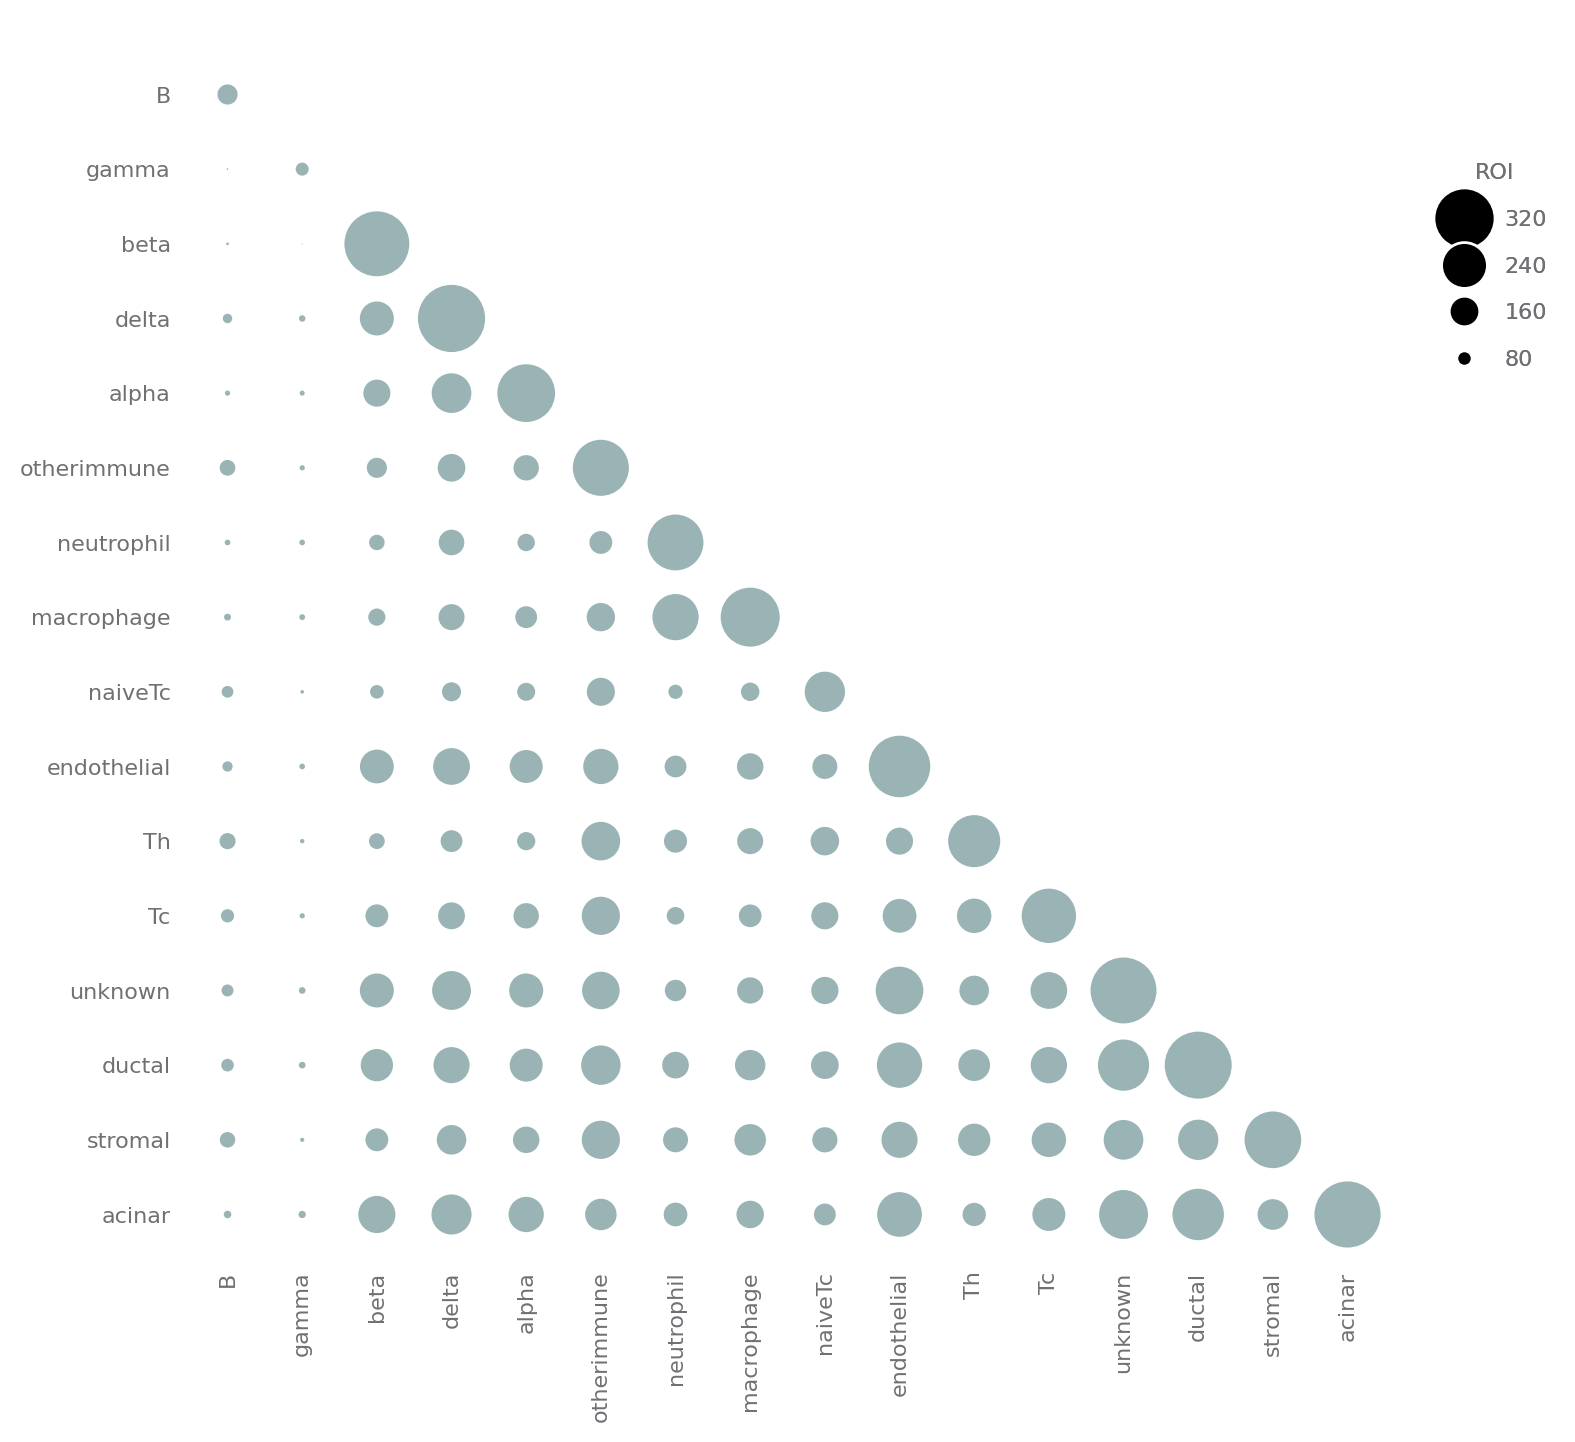

In [10]:
sp.cell_co_occurrence(data, xtickslabel_rotation=90)

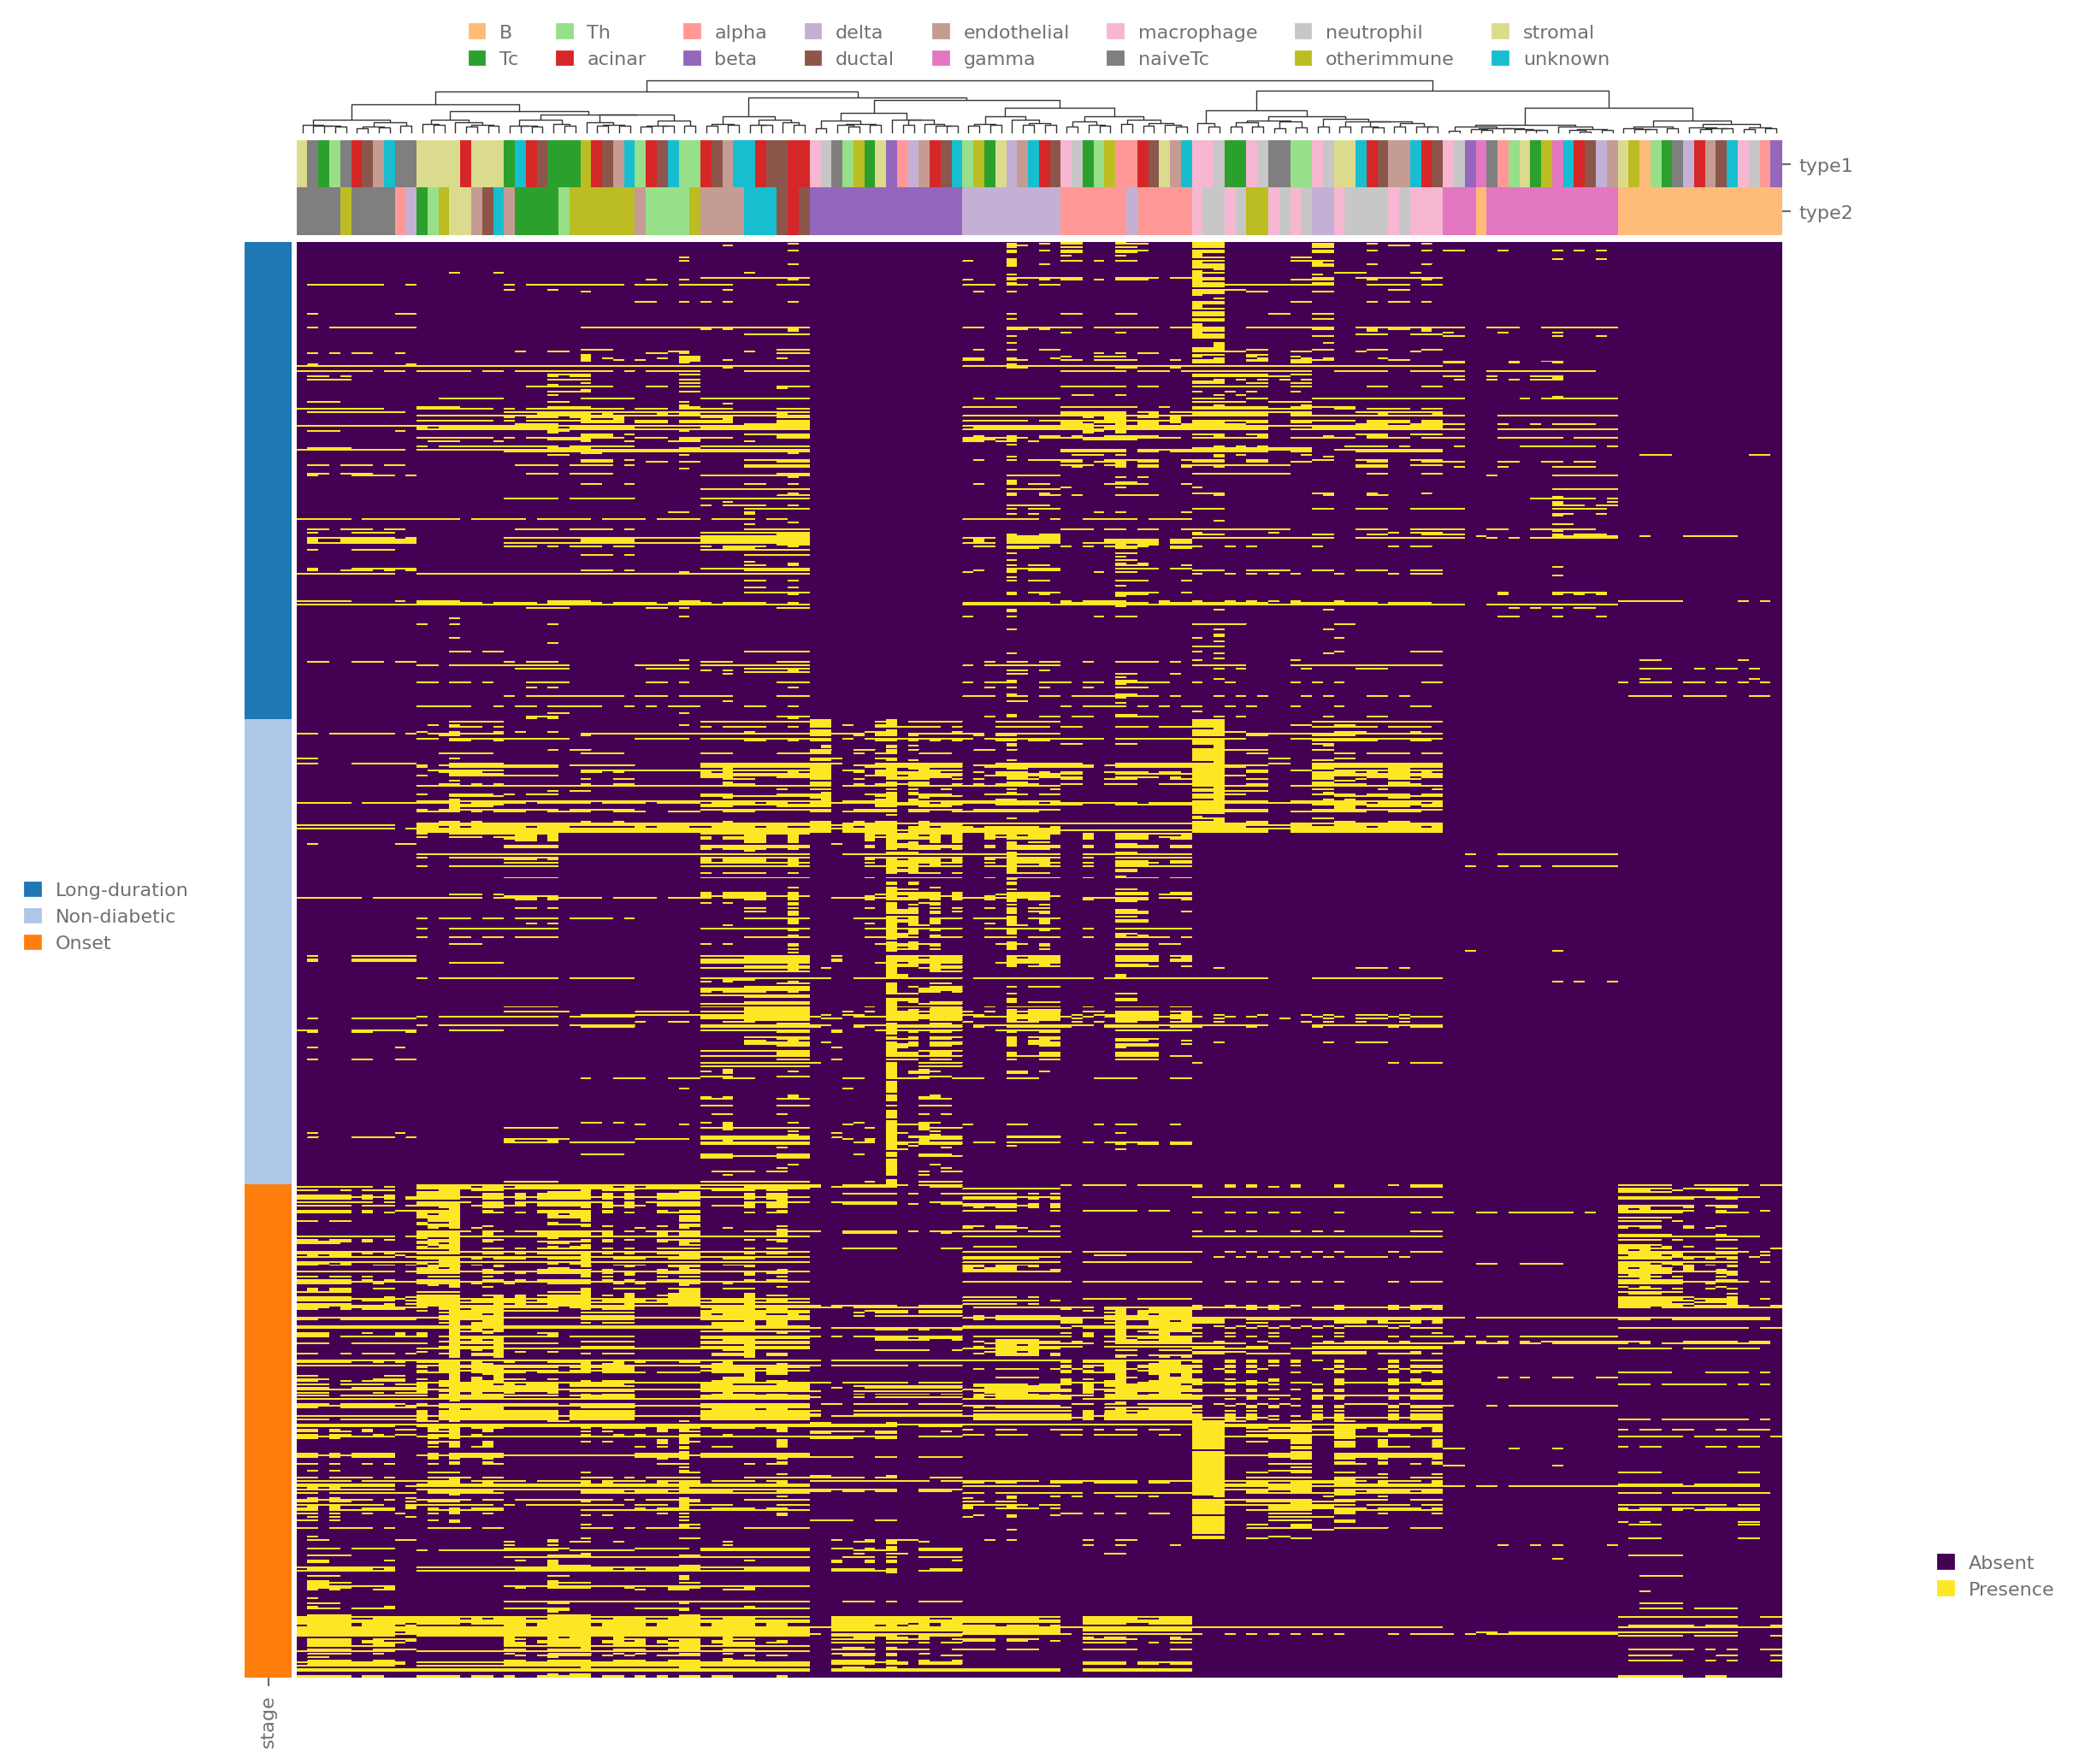

In [11]:
sp.cell_co_occurrence(data, ['stage'], use="heatmap")

## Cell Morphology

The distribution of one of your cell's morphology metrics, if your morphology information is available.

Here we can get the cell's eccentricity.

In [12]:
st.cell_morphology(data, metric_key="eccentricity")

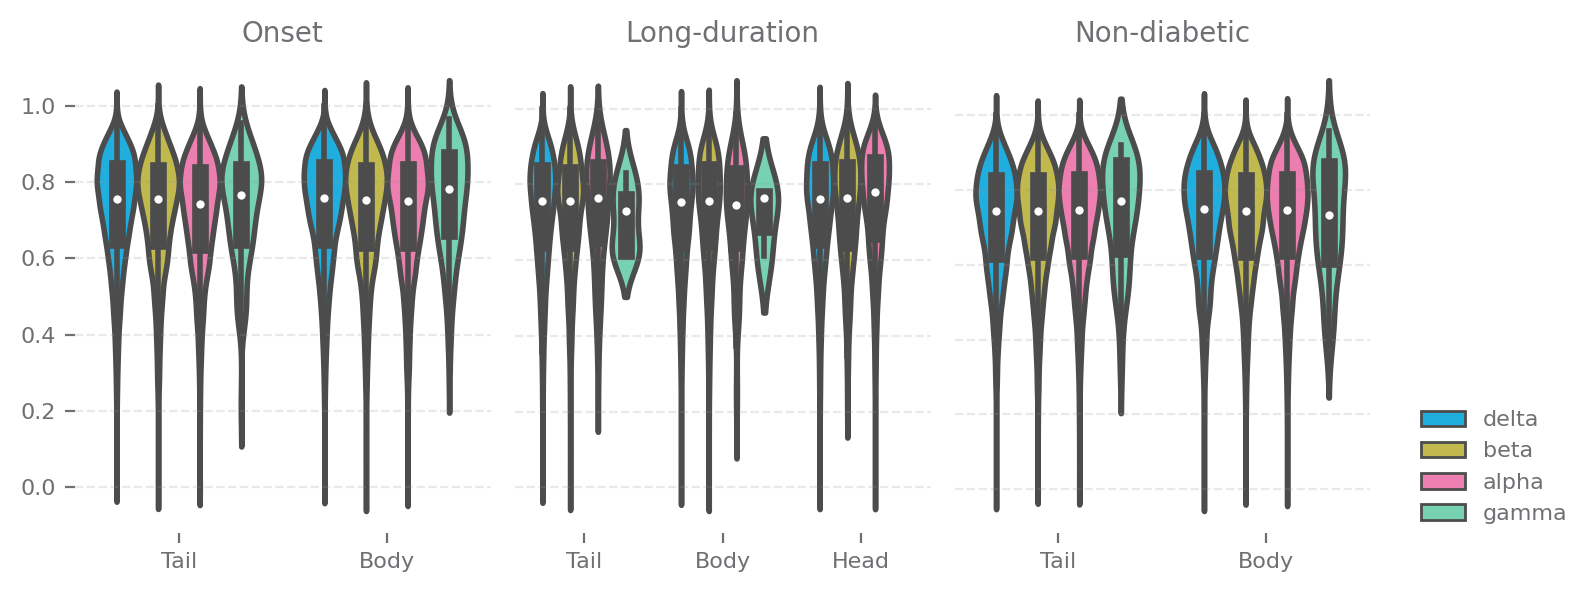

In [13]:
sp.cell_morphology(data, ['stage', 'part'], selected_types=islets_cells, size=(8, 3))